In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv("Copper_Set.csv") 

In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.shape 

(181673, 14)

In [5]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
df = df.drop(columns = ['id','item_date','delivery date','material_ref'])

In [9]:
df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181668,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00
181669,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00
181670,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00
181671,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00


In [10]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

In [11]:
df['quantity tons'].dtype

dtype('float64')

In [12]:
df['quantity tons'].isnull().sum()

1

In [13]:
df = df.dropna(subset = ['quantity tons']) 

In [14]:
df['quantity tons'].min()

-2000.0

In [15]:
df['quantity tons'].max()

1000000000.0

In [16]:
df['quantity tons'].describe()

count    1.816720e+05
mean     5.874926e+03
std      2.349081e+06
min     -2.000000e+03
25%      1.097030e+01
50%      3.036464e+01
75%      6.716061e+01
max      1.000000e+09
Name: quantity tons, dtype: float64

In [17]:
df['quantity tons_log'] = np.log(df['quantity tons'])

In [18]:
df['quantity tons_log'].dtype

dtype('float64')

In [19]:
df = df.drop(columns = ['quantity tons'])

In [20]:
df['quantity tons_log'].isnull().sum()

4

In [21]:
df = df.dropna(subset = ['quantity tons_log']) 

In [22]:
df['customer'].isnull().sum()

1

In [23]:
df = df.dropna(subset = ['customer']) 

In [24]:
df.country.isnull().sum()

28

In [25]:
df.country.mode()

0    78.0
Name: country, dtype: float64

In [26]:
df.country.mode()[0]

78.0

In [27]:
df.country = df.country.fillna(df.country.mode()[0])

In [28]:
df.product_ref.astype('str')

0         1670798778
1         1668701718
2             628377
3         1668701718
4             640665
             ...    
181667     164141591
181668     164141591
181669     164141591
181670     164141591
181672     164141591
Name: product_ref, Length: 181667, dtype: object

In [29]:
df.product_ref.value_counts()

611993        45726
164141591     28782
640665        27375
1670798778    18915
628377        18574
1668701718    15284
640405         9715
1671863738     5162
1332077137     4560
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      257
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: product_ref, dtype: int64

In [30]:
df.product_ref.isnull().sum()

0

In [31]:
df['item type'].isnull().sum()

0

In [32]:
df['status'].isnull().sum()

2

In [33]:
df = df.dropna(subset = ['status'] ) 

In [34]:
df['application'].isnull().sum()

24

In [35]:
df.application=df.application.fillna(df.application.median())

In [36]:
df['application'] = df['application'].astype('int64')

In [37]:
df.shape

(181665, 10)

In [38]:
df['thickness'].isnull().sum()

1

In [39]:
df = df.dropna(subset = ['thickness'] )    

In [40]:
df['thickness_log'] = np.log(df['thickness'])

In [41]:
df = df.drop(columns = ['thickness'])

In [42]:
df['width'].isnull().sum()

0

In [43]:
df['selling_price'].isnull().sum()

1

In [44]:
df = df.dropna(subset = ['selling_price'] )    

In [45]:
x_value=df['selling_price'].min()
x_value

-1160.0

In [46]:
df = df[~(df['selling_price'] <= 0)]

In [47]:
df['selling_price_log'] = np.log(df['selling_price'])

In [48]:
df = df.drop(columns = ['selling_price'])

In [49]:
df.shape

(181656, 10)

In [50]:
df

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10,1500.0,1670798778,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41,1210.0,1668701718,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28,952.0,628377,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59,1317.0,1668701718,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10,2000.0,640665,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,Won,W,41,1240.0,164141591,4.670802,-0.040822,6.400257
181668,30200854.0,25.0,Won,W,41,1220.0,164141591,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,Won,W,41,1500.0,164141591,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,Won,W,41,1250.0,164141591,1.443523,-0.342490,6.428105


In [51]:
df['application'].isnull().sum()

0

In [52]:
df.isnull().sum()

customer             0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
quantity tons_log    0
thickness_log        0
selling_price_log    0
dtype: int64

<Axes: >

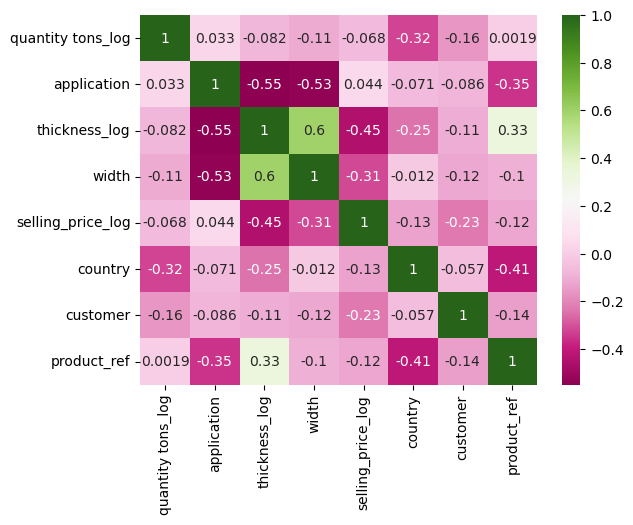

In [53]:
x=df[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()
sns.heatmap(x.corr(), annot=True,cmap='PiYG')

In [54]:
df.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [55]:
num_var = df[['customer', 'width','quantity tons_log', 'thickness_log','selling_price_log']]
cat_var = df[['country', 'status', 'item type', 'application', 'product_ref']]
tar_var = df[['selling_price_log']]

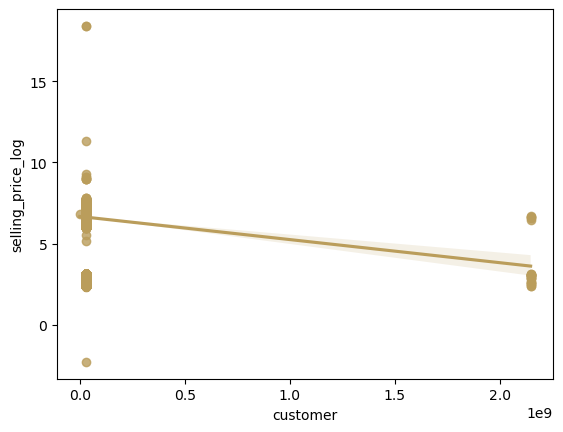

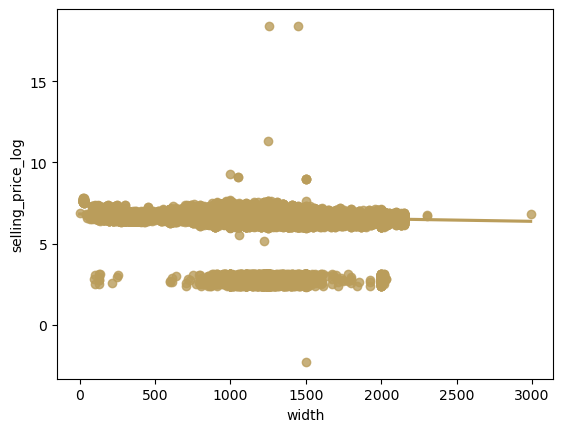

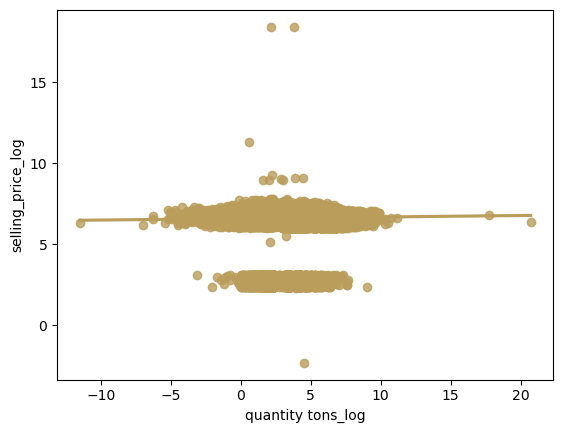

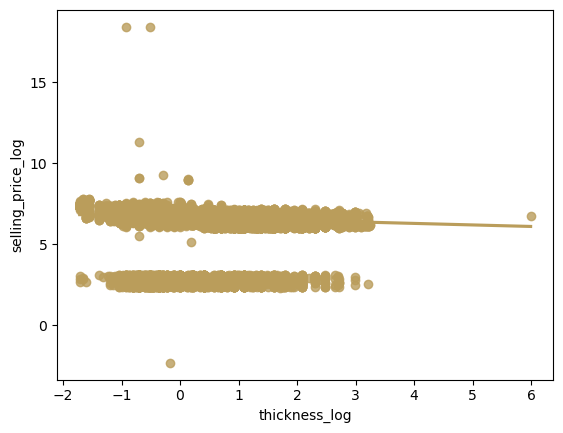

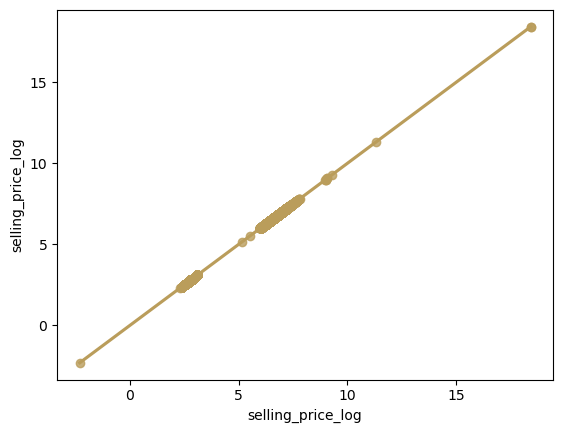

In [56]:
for i in num_var.columns:
    sns.regplot(data=df,x=i,y='selling_price_log',color='#ba9d5b')
    plt.xlabel(f'{i}')
    plt.ylabel('selling_price_log')
    plt.show()

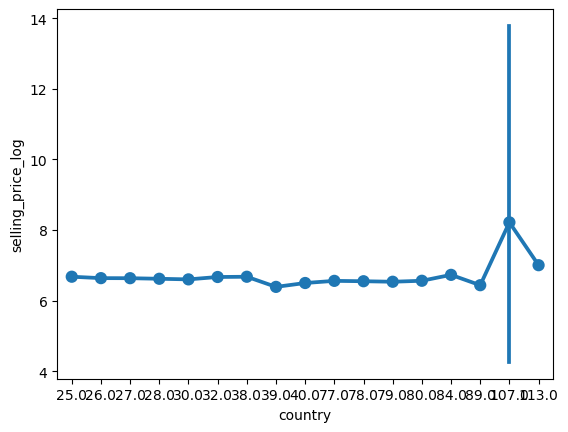

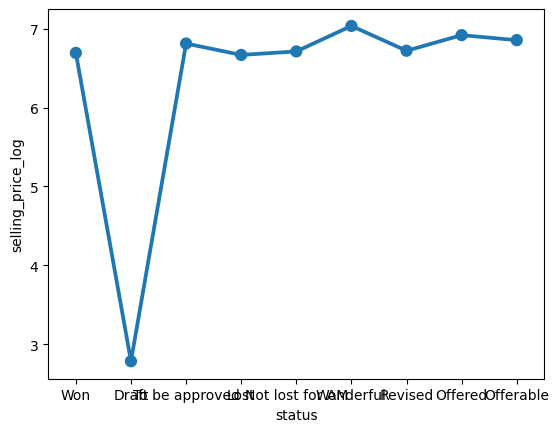

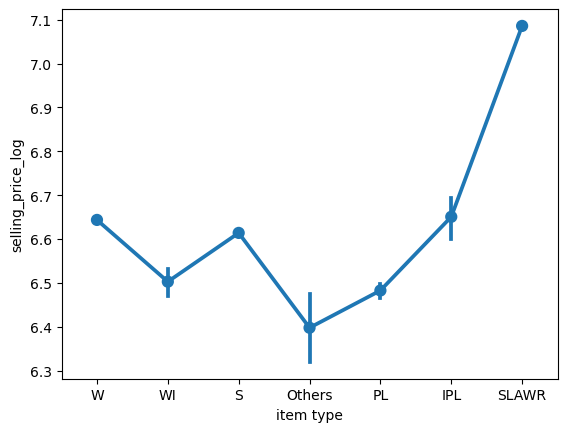

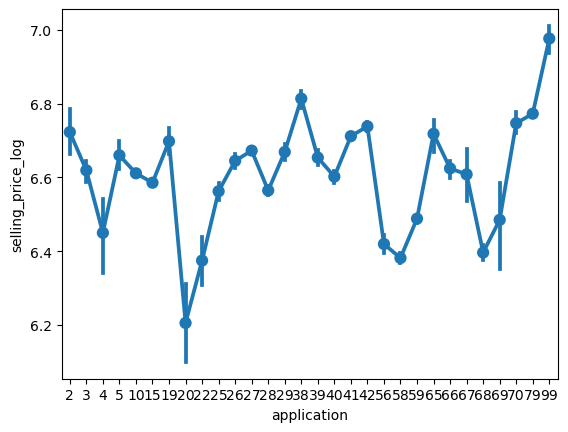

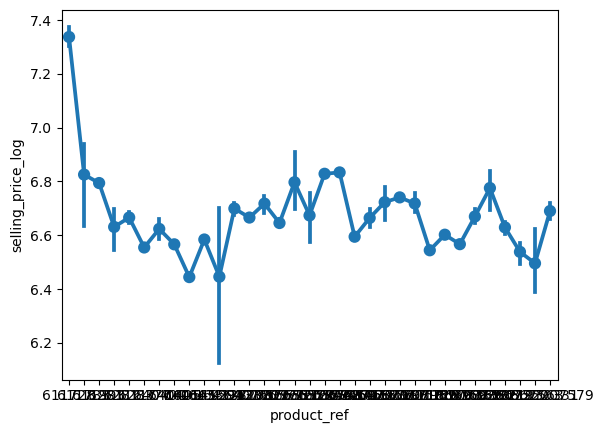

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in cat_var.columns:

    sns.pointplot(data=df,x=i, y='selling_price_log', ci=95)  # ci parameter sets the confidence interval
    plt.show()


In [70]:
dft = df

In [71]:
dft = pd.get_dummies(dft,columns = ["item type"])
dft = pd.get_dummies(dft,columns = ["status"])
dft = pd.get_dummies(dft,columns = ["product_ref"])
dft = pd.get_dummies(dft,columns = ["application"])
dft = pd.get_dummies(dft,columns = ["country"])

In [72]:
df

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log
0,30156308.00,28.00,Won,W,10,1500.00,1670798778,3.99,0.69,6.75
1,30202938.00,25.00,Won,W,41,1210.00,1668701718,6.64,-0.22,6.95
2,30153963.00,30.00,Won,WI,28,952.00,628377,5.96,-0.97,6.47
3,30349574.00,32.00,Won,S,59,1317.00,1668701718,5.31,0.83,6.64
4,30211560.00,28.00,Won,W,10,2000.00,640665,6.67,1.39,6.36
...,...,...,...,...,...,...,...,...,...,...
181667,30200854.00,25.00,Won,W,41,1240.00,164141591,4.67,-0.04,6.40
181668,30200854.00,25.00,Won,W,41,1220.00,164141591,4.63,-0.04,6.38
181669,30200854.00,25.00,Won,W,41,1500.00,164141591,5.34,-0.05,6.38
181670,30200854.00,25.00,Won,W,41,1250.00,164141591,1.44,-0.34,6.43


In [73]:
dft

,customer,width,quantity tons_log,thickness_log,selling_price_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0
0,30156308.00,1500.00,3.99,0.69,6.75,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30202938.00,1210.00,6.64,-0.22,6.95,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30153963.00,952.00,5.96,-0.97,6.47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30349574.00,1317.00,5.31,0.83,6.64,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,30211560.00,2000.00,6.67,1.39,6.36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,30200854.00,1240.00,4.67,-0.04,6.40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181668,30200854.00,1220.00,4.63,-0.04,6.38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181669,30200854.00,1500.00,5.34,-0.05,6.38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181670,30200854.00,1250.00,1.44,-0.34,6.43,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
Y_f = dft['selling_price_log']
X_f = dft.drop('selling_price_log', axis = 1)

In [75]:
Y = dft['selling_price_log'].values
X = dft.drop('selling_price_log', axis = 1).values

In [76]:
feature_list = list(dft.drop('selling_price_log', axis = 1).columns)

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [78]:
x_train

array([[3.03467300e+07, 1.25000000e+03, 3.43534025e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.01982670e+07, 1.28500000e+03, 2.65691117e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.03303520e+07, 1.25000000e+03, 3.34678127e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.02911840e+07, 1.25000000e+03, 3.25012691e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.01980740e+07, 1.25000000e+03, 2.29709385e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.02058250e+07, 1.23600000e+03, 3.85064065e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [79]:
x_train.shape, x_test.shape

((145324, 100), (36332, 100))

In [80]:
y_train

array([6.25575004, 7.44014668, 6.90875478, ..., 7.24820531, 6.41509696,
       6.93634274])

In [81]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.transform(x_test)

In [82]:
import pickle
with open('Scalar.pickle', 'wb') as a:
    pickle.dump(std, a)

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [88]:
dtr_model = grid_search.best_estimator_

dtr_model.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)

In [90]:
r2_score(dtr_model.predict(x_test_scaled),y_test)

0.9153187060654927

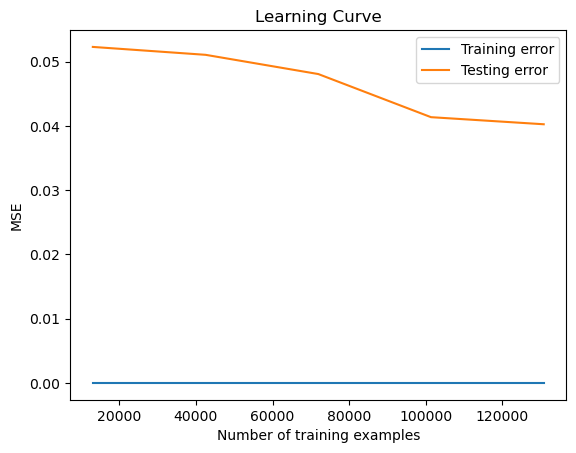

In [91]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(
    dtr, x_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, -train_mean, label='Training error')
plt.plot(train_sizes, -test_mean, label='Testing error')
plt.xlabel('Number of training examples')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve')
plt.show()

In [93]:
importances = list(dtr_model.feature_importances_)


feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: status_Draft         Importance: 0.86
Variable: product_ref_611993   Importance: 0.05
Variable: customer             Importance: 0.01
Variable: quantity tons_log    Importance: 0.01
Variable: thickness_log        Importance: 0.01
Variable: product_ref_640665   Importance: 0.01
Variable: width                Importance: 0.0
Variable: item type_IPL        Importance: 0.0
Variable: item type_Others     Importance: 0.0
Variable: item type_PL         Importance: 0.0
Variable: item type_S          Importance: 0.0
Variable: item type_SLAWR      Importance: 0.0
Variable: item type_W          Importance: 0.0
Variable: item type_WI         Importance: 0.0
Variable: status_Lost          Importance: 0.0
Variable: status_Not lost for AM Importance: 0.0
Variable: status_Offerable     Importance: 0.0
Variable: status_Offered       Importance: 0.0
Variable: status_Revised       Importance: 0.0
Variable: status_To be approved Importance: 0.0
Variable: status_Won           Importance: 0.0
Vari

In [94]:
import pickle                                       # Saving DTR_model as pickel      
with open('DTR_model.pickle', 'wb') as a:
    pickle.dump(dtr_model, a)

In [98]:
dn = pd.DataFrame({'customer':[30349546.0], 'country':['30.0'], 'status':['Won'], 'item type':['PL'], 'application':['28'], 'width':[1210.0],
       'product_ref':[628377], 'quantity tons_log':[np.log(250)], 'thickness_log':[np.log(40)]})
dn

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log
0,30349546.00,30.0,Won,PL,28,1210.00,628377,5.52,3.69


In [99]:
dn.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log'],
      dtype='object')

In [100]:
dn_one_hot = pd.get_dummies(dn, columns=['application'], prefix='application')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['country'], prefix='country')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['status'], prefix='status')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['product_ref'], prefix='product_ref')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['item type'], prefix='item type')

dn_one_hot

,customer,width,quantity tons_log,thickness_log,application_28,country_30.0,status_Won,product_ref_628377,item type_PL
0,30349546.00,1210.00,5.52,3.69,1,1,1,1,1


In [101]:
len(X_f.columns)

100

In [102]:
import pickle
with open('X_f.columns.pickle', 'wb') as a:
    pickle.dump(X_f.columns, a)

In [103]:
with open('X_f.columns.pickle', 'rb') as a:
    k = pickle.load(a)

In [104]:
new_data = pd.DataFrame(columns=k)
new_data

,customer,width,quantity tons_log,thickness_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0


In [105]:
new_data.shape

(0, 100)

In [106]:
new_data = new_data.append(dn_one_hot)              # appending dn_one_hot to new_data
new_data

,customer,width,quantity tons_log,thickness_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0
0,30349546.00,1210.00,5.52,3.69,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
new_data.shape

(1, 100)

In [108]:
new_data = new_data.fillna(0)                         # filling nan values with '0'
new_data

,customer,width,quantity tons_log,thickness_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0
0,30349546.00,1210.00,5.52,3.69,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
features = new_data.values

In [110]:
with open('Scalar.pickle', 'rb') as b:
    l = pickle.load(b)

In [111]:
new_sample = l.transform(features)

In [112]:
with open('DTR_model.pickle', 'rb') as c:
    m = pickle.load(c)

In [113]:
new_pred = m.predict(new_sample)
new_pred

array([6.23591839])

In [114]:
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [510.76948842]


In [115]:
# Status Prediction

dfu = df

In [116]:
dfu = df[df['status'].isin(['Won', 'Lost'])]
len(dfu)

150437

In [117]:
dfu["status"] = dfu["status"].map({"Won" : 1, "Lost" : 0})

Class 0: 34437
Class 1: 116000
Proportion of class 0 is  22.89 %


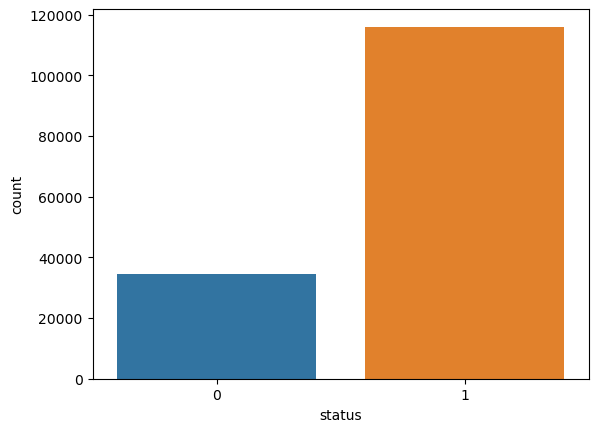

In [118]:
target_count = dfu.status.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
sns.countplot(x='status', data=dfu)
plt.show()

In [119]:
dfu.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [120]:
num_var = df[[ 'customer', 'width','quantity tons_log', 'thickness_log','selling_price_log']]
cat_var = df[['country', 'status', 'item type', 'application', 'product_ref']]
tar_var = df[['status']]

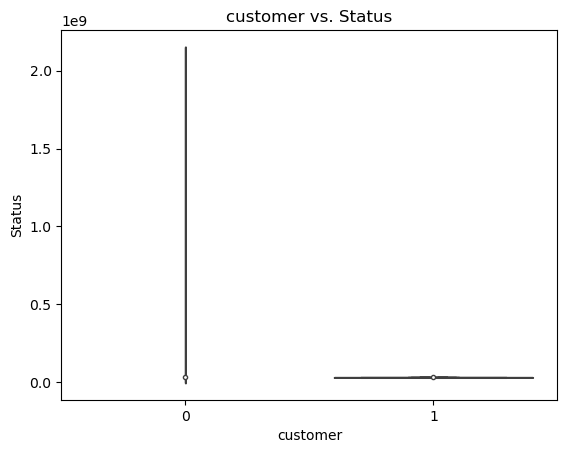

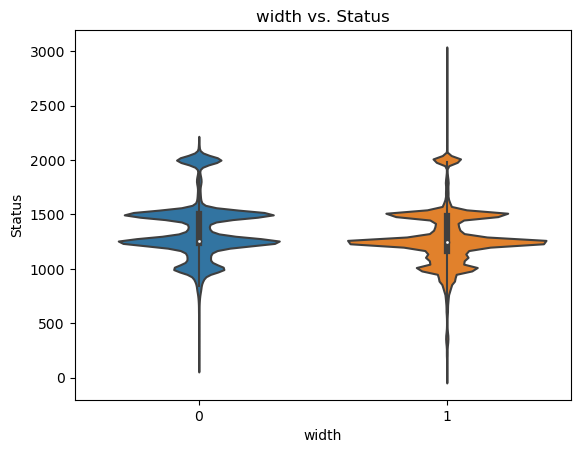

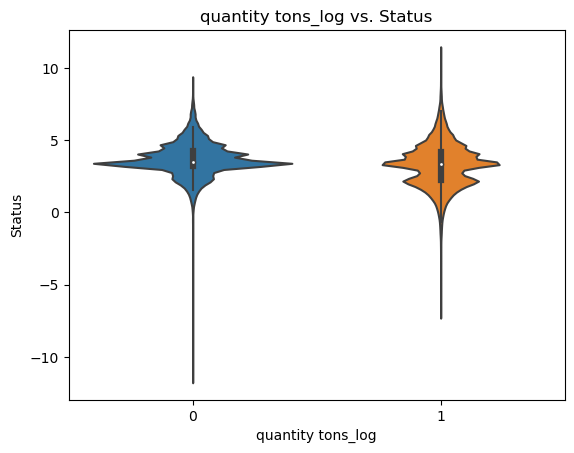

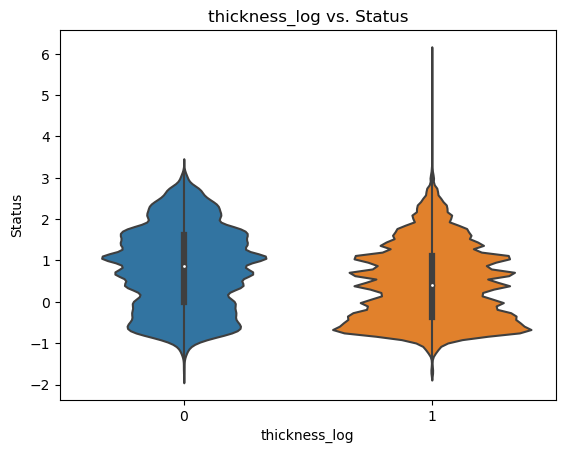

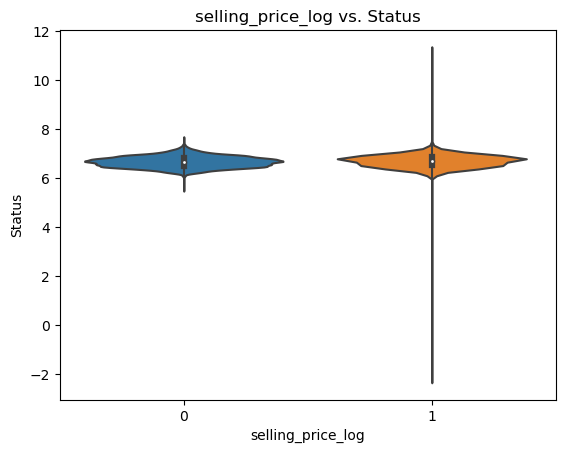

In [121]:
import seaborn as sns

for i in num_var.columns:

    sns.violinplot(x='status', y=i, data=dfu)

    plt.xlabel(f'{i}')
    plt.ylabel('Status')
    plt.title(f'{i} vs. Status')
    plt.show()

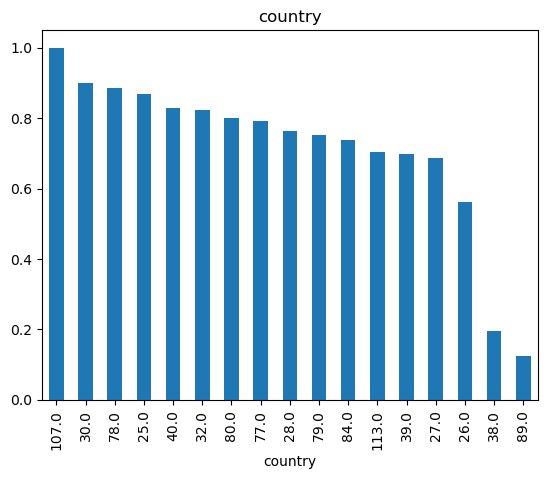

country
107.00   1.00
30.00    0.90
78.00    0.89
25.00    0.87
40.00    0.83
32.00    0.82
80.00    0.80
77.00    0.79
28.00    0.76
79.00    0.75
84.00    0.74
113.00   0.70
39.00    0.70
27.00    0.69
26.00    0.56
38.00    0.20
89.00    0.12
Name: status, dtype: float64


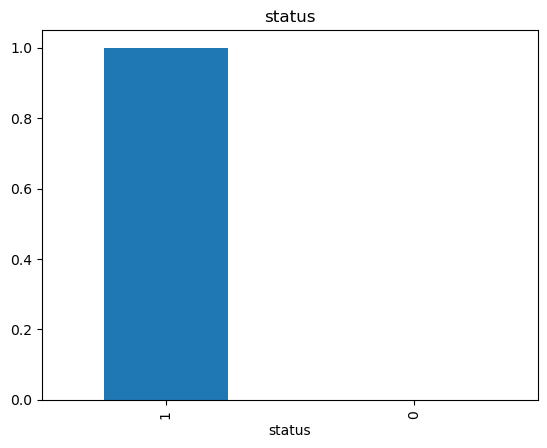

status
1   1.00
0   0.00
Name: status, dtype: float64


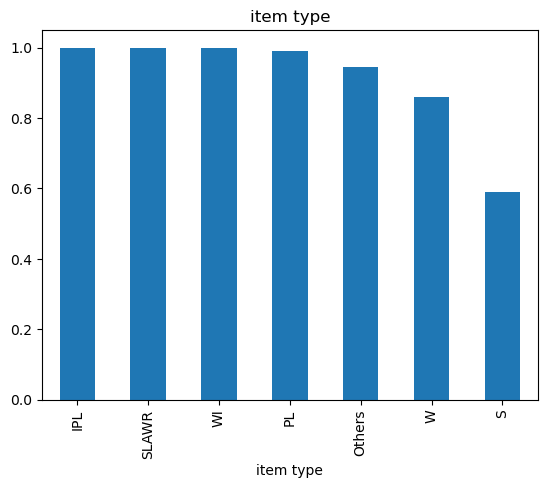

item type
IPL      1.00
SLAWR    1.00
WI       1.00
PL       0.99
Others   0.94
W        0.86
S        0.59
Name: status, dtype: float64


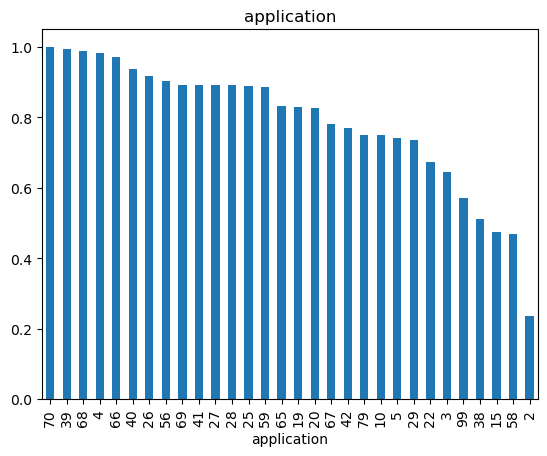

application
70   1.00
39   0.99
68   0.99
4    0.98
66   0.97
40   0.94
26   0.92
56   0.90
69   0.89
41   0.89
27   0.89
28   0.89
25   0.89
59   0.89
65   0.83
19   0.83
20   0.83
67   0.78
42   0.77
79   0.75
10   0.75
5    0.74
29   0.74
22   0.67
3    0.65
99   0.57
38   0.51
15   0.47
58   0.47
2    0.24
Name: status, dtype: float64


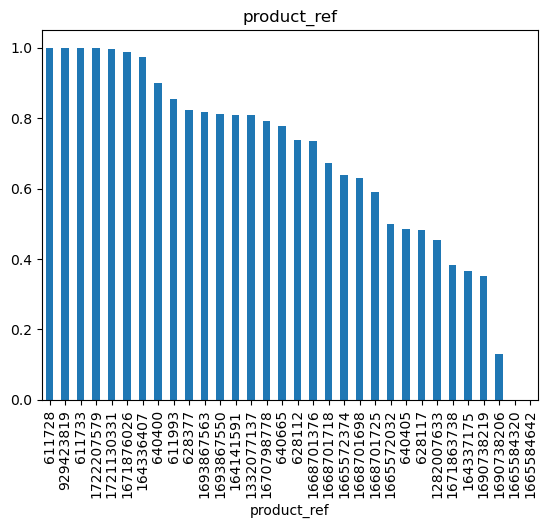

product_ref
611728       1.00
929423819    1.00
611733       1.00
1722207579   1.00
1721130331   1.00
1671876026   0.99
164336407    0.97
640400       0.90
611993       0.85
628377       0.82
1693867563   0.82
1693867550   0.81
164141591    0.81
1332077137   0.81
1670798778   0.79
640665       0.78
628112       0.74
1668701376   0.74
1668701718   0.67
1665572374   0.64
1668701698   0.63
1668701725   0.59
1665572032   0.50
640405       0.48
628117       0.48
1282007633   0.45
1671863738   0.38
164337175    0.37
1690738219   0.35
1690738206   0.13
1665584320   0.00
1665584642   0.00
Name: status, dtype: float64


In [122]:
for i in cat_var:
    dfu.groupby(i)['status'].mean().sort_values(ascending=False).plot(kind='bar')
    plt.title(i) # add a title to each plot
    plt.show()  # create a new figure for each plot
    print(dfu.groupby(i)['status'].mean().sort_values(ascending=False))

In [123]:
dfu = pd.get_dummies(dfu,columns = ["item type"])
dfu = pd.get_dummies(dfu,columns = ["product_ref"])
dfu = pd.get_dummies(dfu,columns = ["application"])
dfu = pd.get_dummies(dfu,columns = ["country"])

In [124]:
dfu

,customer,status,width,quantity tons_log,thickness_log,selling_price_log,item type_IPL,item type_Others,item type_PL,item type_S,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0
0,30156308.00,1,1500.00,3.99,0.69,6.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30202938.00,1,1210.00,6.64,-0.22,6.95,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30153963.00,1,952.00,5.96,-0.97,6.47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30349574.00,1,1317.00,5.31,0.83,6.64,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,30211560.00,1,2000.00,6.67,1.39,6.36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,30200854.00,1,1240.00,4.67,-0.04,6.40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181668,30200854.00,1,1220.00,4.63,-0.04,6.38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181669,30200854.00,1,1500.00,5.34,-0.05,6.38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181670,30200854.00,1,1250.00,1.44,-0.34,6.43,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
Y_u = dfu['status']
X_u = dfu.drop('status', axis = 1) 

In [126]:
Y = dfu['status'].values
X = dfu.drop('status', axis = 1).values

In [127]:
feature_list = list(dfu.drop('status', axis = 1).columns)

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [129]:
x_train

array([[3.02029380e+07, 1.11500000e+03, 2.90726665e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.03935740e+07, 9.75000000e+02, 1.26343936e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.02722620e+07, 1.50000000e+03, 4.27411582e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.01603780e+07, 1.24800000e+03, 4.14106177e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.01600050e+07, 1.50000000e+03, 2.70619715e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.02056580e+07, 1.16600000e+03, 2.17322399e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [130]:
x_train.shape, x_test.shape

((120349, 91), (30088, 91))

In [131]:
y_train

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [132]:
from sklearn.preprocessing import StandardScaler

cstd = StandardScaler()
x_train_scaled = cstd.fit_transform(x_train)
x_test_scaled = cstd.transform(x_test)

In [133]:
import pickle                             
with open('C_Scalar.pickle', 'wb') as a:
    pickle.dump(cstd, a)

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
import numpy as np

In [135]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,100]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(x_train_scaled, y_train) 
  trainAccuracy = accuracy_score(y_train, dt.predict(x_train_scaled)) 
  
  
  dt = DecisionTreeClassifier(max_depth=depth)
  valAccuracy = cross_val_score(dt, x_train_scaled, y_train, cv=10)
  print("Depth: ", depth, "Training Accuracy: ", round(trainAccuracy, 4), "Cross val score: ", round(np.mean(valAccuracy), 4))

Depth:  1 Training Accuracy:  0.7718 Cross val score:  0.7718
Depth:  2 Training Accuracy:  0.7996 Cross val score:  0.7996
Depth:  3 Training Accuracy:  0.8118 Cross val score:  0.8118
Depth:  4 Training Accuracy:  0.8234 Cross val score:  0.8233
Depth:  5 Training Accuracy:  0.83 Cross val score:  0.8297
Depth:  6 Training Accuracy:  0.8377 Cross val score:  0.8373
Depth:  7 Training Accuracy:  0.8417 Cross val score:  0.8409
Depth:  8 Training Accuracy:  0.8465 Cross val score:  0.844
Depth:  9 Training Accuracy:  0.8552 Cross val score:  0.8508
Depth:  10 Training Accuracy:  0.8624 Cross val score:  0.8568
Depth:  20 Training Accuracy:  0.9602 Cross val score:  0.909
Depth:  30 Training Accuracy:  0.996 Cross val score:  0.9156
Depth:  40 Training Accuracy:  1.0 Cross val score:  0.9152
Depth:  50 Training Accuracy:  1.0 Cross val score:  0.9147
Depth:  100 Training Accuracy:  1.0 Cross val score:  0.9154


In [136]:
dtc = DecisionTreeClassifier(max_depth=30)

# Fit dt to the training set
dtc.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=30)

In [137]:
y_pred_dt = dtc.predict(x_test_scaled)
y_pred_dt

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [138]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,dtc.predict_proba(x_test_scaled)[:,1])

0.890817812555809

In [139]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 score:", f1_score(y_test, y_pred_dt))
print("auroc:", roc_auc_score(y_test, y_pred_dt))

Accuracy: 0.9205331028981654
F1 score: 0.9483172297516373
auroc: 0.8875517351324003


In [140]:
import numpy as np

y_pred_dt = np.array(y_pred_dt)
count_of_1 = np.count_nonzero(y_pred_dt == 1)
count_of_0 = np.count_nonzero(y_pred_dt == 0)
print(count_of_1, count_of_0)
len(y_pred_dt)

23149 6939


30088

Confusion matrix:
 [[ 5761  1213]
 [ 1178 21936]]


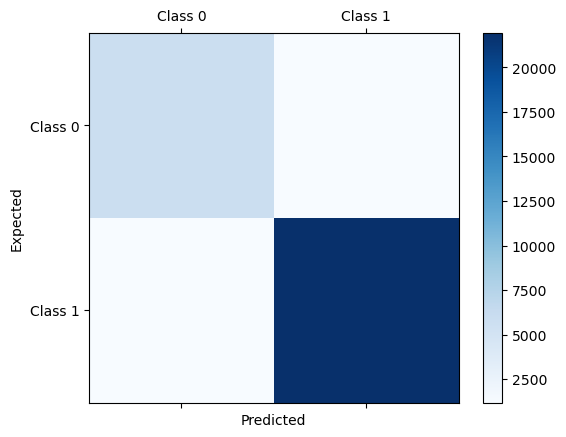

In [141]:
from sklearn.metrics import confusion_matrix                                    
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_dt)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()   

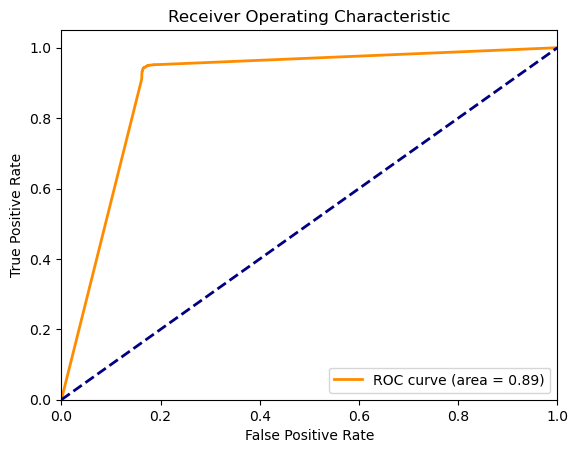

In [142]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(x_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

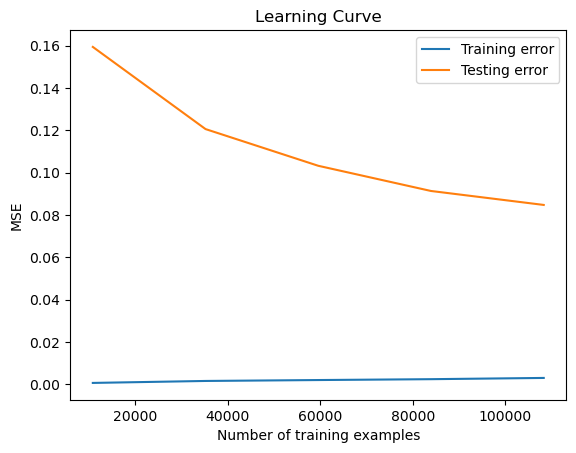

In [143]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(
    dtc, x_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, -train_mean, label='Training error')
plt.plot(train_sizes, -test_mean, label='Testing error')
plt.xlabel('Number of training examples')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve')
plt.show()

In [144]:
importances = list(dtc.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: selling_price_log    Importance: 0.16
Variable: customer             Importance: 0.15
Variable: quantity tons_log    Importance: 0.15
Variable: item type_S          Importance: 0.1
Variable: country_26.0         Importance: 0.06
Variable: thickness_log        Importance: 0.05
Variable: width                Importance: 0.04
Variable: application_15       Importance: 0.04
Variable: country_32.0         Importance: 0.02
Variable: item type_W          Importance: 0.01
Variable: product_ref_611993   Importance: 0.01
Variable: product_ref_628377   Importance: 0.01
Variable: product_ref_640665   Importance: 0.01
Variable: product_ref_164141591 Importance: 0.01
Variable: product_ref_1668701718 Importance: 0.01
Variable: product_ref_1670798778 Importance: 0.01
Variable: application_10       Importance: 0.01
Variable: application_25       Importance: 0.01
Variable: application_41       Importance: 0.01
Variable: country_25.0         Importance: 0.01
Variable: country_27.0         Impor

In [145]:
import pickle                                       # Saving DTR_model as pickel      
with open('DTC_model.pickle', 'wb') as a:
    pickle.dump(dtc, a)

In [146]:
dn = pd.DataFrame({'customer':['30349574.0'], 'country':['25.0'],'selling_price_log':[np.log(696.6169392)], 'item type':['PL'], 'application':[28], 'width':[1210.0],
       'product_ref':[1668701718], 'quantity tons_log':[np.log(250)], 'thickness_log':[np.log(40)]})
dn

,customer,country,selling_price_log,item type,application,width,product_ref,quantity tons_log,thickness_log
0,30349574.0,25.0,6.55,PL,28,1210.00,1668701718,5.52,3.69


In [147]:
dn_one_hot = pd.get_dummies(dn, columns=['application'], prefix='application')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['country'], prefix='country')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['product_ref'], prefix='product_ref')
dn_one_hot = pd.get_dummies(dn_one_hot, columns=['item type'], prefix='item type')

dn_one_hot

,customer,selling_price_log,width,quantity tons_log,thickness_log,application_28,country_25.0,product_ref_1668701718,item type_PL
0,30349574.0,6.55,1210.00,5.52,3.69,1,1,1,1


In [148]:
import pickle
with open('X_u.columns.pickle', 'wb') as a:
    pickle.dump(X_u.columns, a)

In [149]:
with open('X_u.columns.pickle', 'rb') as a:
    k = pickle.load(a)

In [150]:
new_data = pd.DataFrame(columns=k)       # Getting all columns of original dataframe
new_data

,customer,width,quantity tons_log,thickness_log,selling_price_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0


In [151]:
new_data.shape

(0, 91)

In [152]:
new_data = new_data.append(dn_one_hot)              # appending dn_one_hot to new_data
new_data

,customer,width,quantity tons_log,thickness_log,selling_price_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0
0,30349574.0,1210.00,5.52,3.69,6.55,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
new_data = new_data.fillna(0)                         # filling nan values with '0'
new_data

,customer,width,quantity tons_log,thickness_log,selling_price_log,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,...,country_39.0,country_40.0,country_77.0,country_78.0,country_79.0,country_80.0,country_84.0,country_89.0,country_107.0,country_113.0
0,30349574.0,1210.00,5.52,3.69,6.55,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
features = new_data.values

In [155]:
with open('C_Scalar.pickle', 'rb') as b:
    l = pickle.load(b)

In [156]:
new_sample = l.transform(features)

In [157]:
with open('DTC_model.pickle', 'rb') as c:
    m = pickle.load(c)

In [158]:
new_pred = m.predict(new_sample)
new_pred

array([1], dtype=int64)

In [159]:
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won
